## Algerian forest fire prediction

In [4]:
from sklearn.datasets import fetch_california_housing
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [10]:
df = pd.read_csv('Algerian.csv',header = 1)

In [12]:
df

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
241,26,09,2012,30,65,14,0,85.4,16,44.5,4.5,16.9,6.5,fire
242,27,09,2012,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,not fire
243,28,09,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire
244,29,09,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire


In [16]:
## missing values

df[df.isnull().any(axis = 1)]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
122,Sidi-Bel Abbes Region Dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
167,14,07,2012,37,37,18,0.2,88.9,12.9,14.6 9,12.5,10.4,fire,NaN


In [24]:
## Converting dataset in to 2 regions based on their names and creating a new column

df.loc[:122,"Region"] = 0
df.loc[122:,"Region"] = 1
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0.0
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,0.0
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0.0
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,0.0
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,0.0


In [32]:
df[['Region']] = df[['Region']].astype(int)
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,0
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,0
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,0


In [43]:
df.isnull().sum()

day            0
month          0
year           0
Temperature    0
 RH            0
 Ws            0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
Region         0
dtype: int64

In [41]:
df = df.dropna().reset_index(drop = True)

In [51]:
df = df.drop(122).reset_index(drop = True)

In [53]:
df.iloc[[122]]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
122,01,06,2012,32,71,12,0.7,57.1,2.5,8.2,0.6,2.8,0.2,not fire,1


In [55]:
df.columns = df.columns.str.strip()

In [57]:
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [59]:
## Changing to float
df[['day', 'month', 'year', 'Temperature', 'RH', 'Ws']] = df[['day', 'month', 'year', 'Temperature', 'RH', 'Ws']].astype(int)

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          243 non-null    int32 
 1   month        243 non-null    int32 
 2   year         243 non-null    int32 
 3   Temperature  243 non-null    int32 
 4   RH           243 non-null    int32 
 5   Ws           243 non-null    int32 
 6   Rain         243 non-null    object
 7   FFMC         243 non-null    object
 8   DMC          243 non-null    object
 9   DC           243 non-null    object
 10  ISI          243 non-null    object
 11  BUI          243 non-null    object
 12  FWI          243 non-null    object
 13  Classes      243 non-null    object
 14  Region       243 non-null    int32 
dtypes: int32(7), object(8)
memory usage: 22.0+ KB


In [71]:
## Changing other datatypes to int
objects = [features for features in df.columns if df[features].dtypes == 'O']

In [75]:
for i in objects:
    if i != 'Classes':
        df[i] = df[i].astype(float)

In [81]:
df_copy = df.drop(['day','month','year'],axis = 1)

In [83]:
df_copy['Classes'].value_counts()

Classes
fire             131
not fire         101
fire               4
fire               2
not fire           2
not fire           1
not fire           1
not fire           1
Name: count, dtype: int64

In [85]:
df_copy['Classes'] = np.where(df_copy['Classes'].str.contains('not fire'),0,1)

In [87]:
df_copy['Classes'].value_counts()

Classes
1    137
0    106
Name: count, dtype: int64

In [89]:
df_copy.tail()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
238,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,1,1
239,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,0,1
240,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,0,1
241,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,0,1
242,24,64,15,0.2,67.3,3.8,16.5,1.2,4.8,0.5,0,1


C:\Users\shivam\AppData\Local\Temp\ipykernel_19020\356067802.py:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


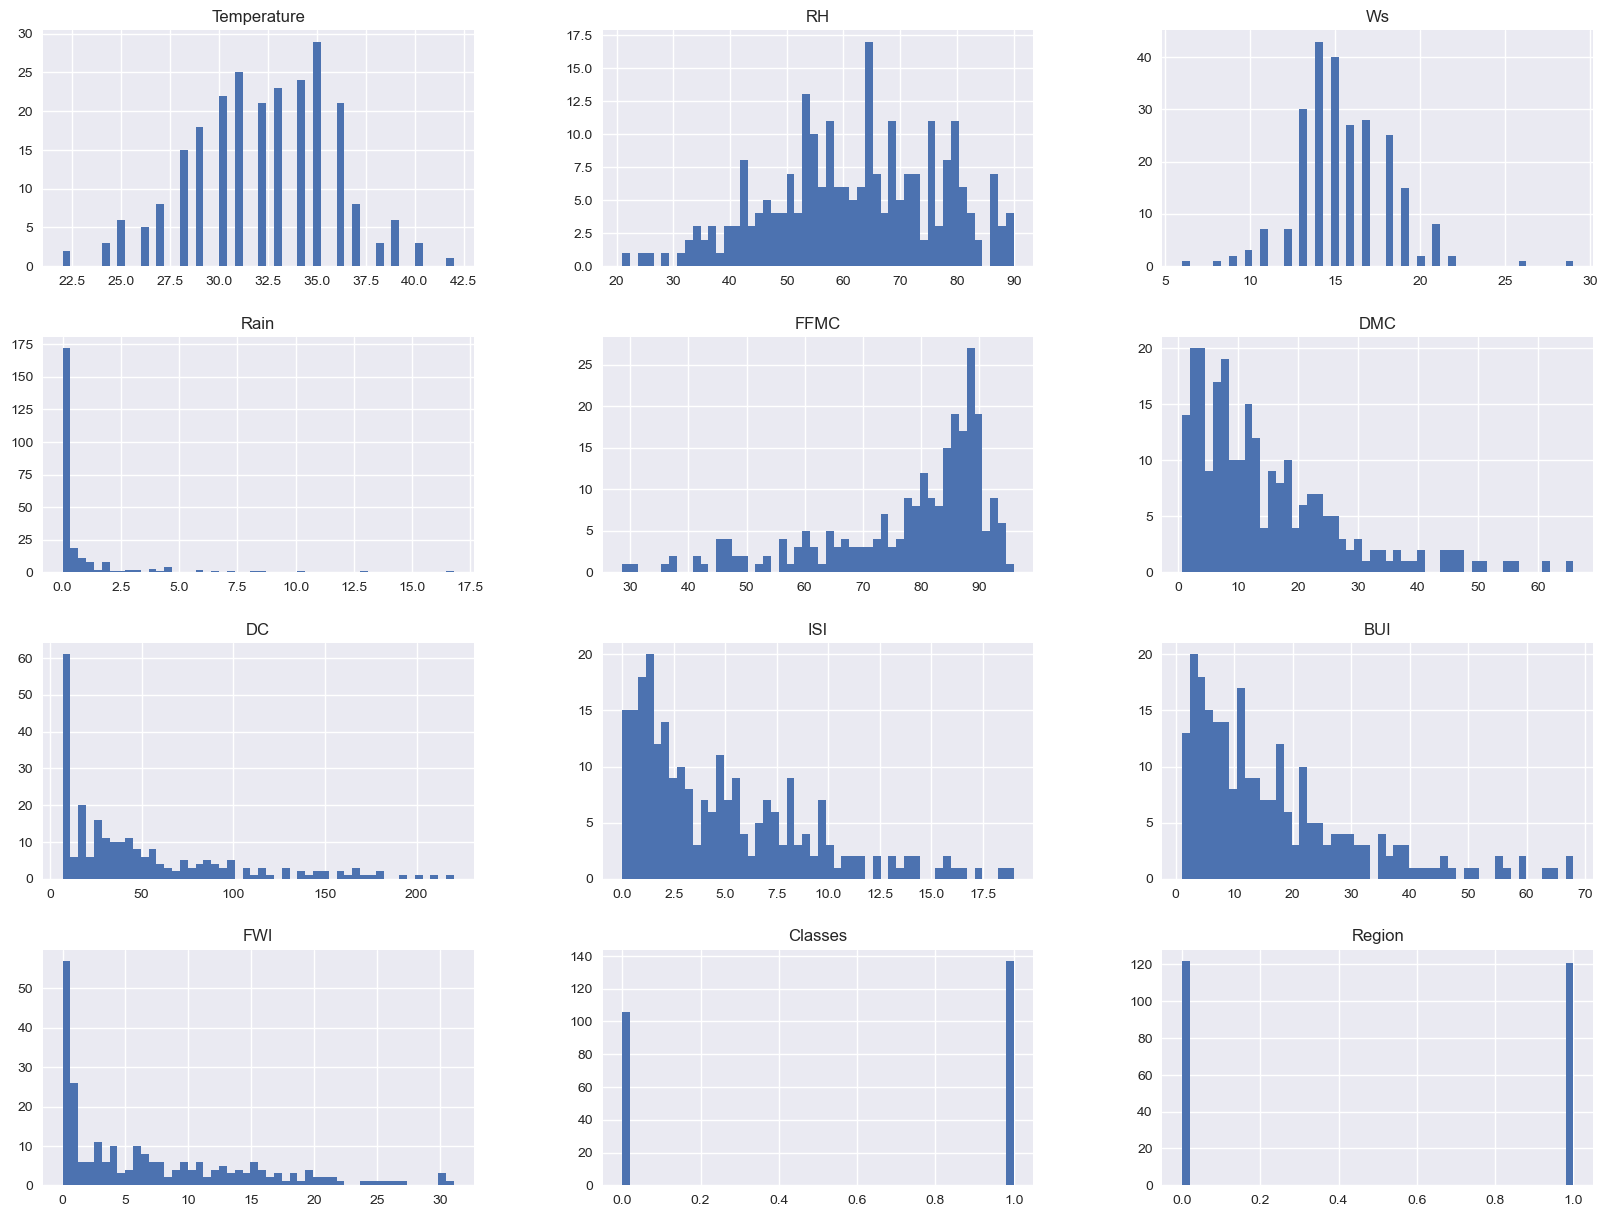

In [95]:
plt.style.use('seaborn')
df_copy.hist(bins = 50,figsize = (20,15))
plt.show()

In [101]:
percentage = df_copy['Classes'].value_counts(normalize =True)*100
percentage

Classes
1    56.378601
0    43.621399
Name: proportion, dtype: float64

<Axes: >

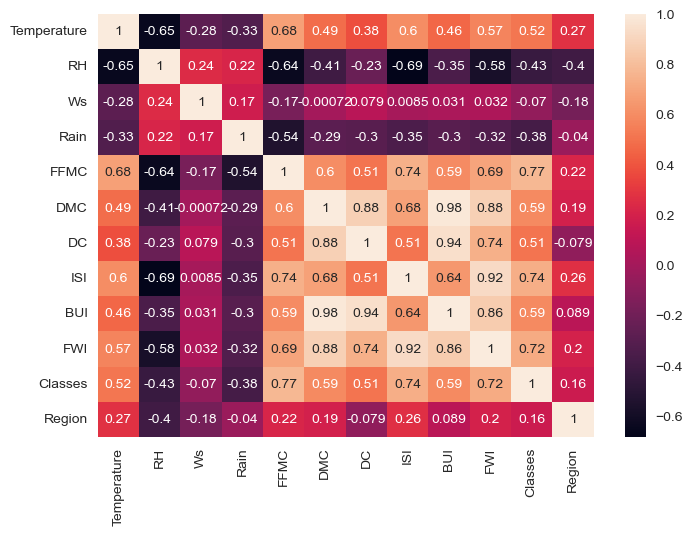

In [103]:
sns.heatmap(df_copy.corr(),annot=True)

## Model Training

In [106]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [112]:
df = df.drop(['day','month','year'],inplace=True)
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [120]:
df['Classes'] = np.where(df['Classes'].str.contains("not fire"),0,1)

In [226]:
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0


In [198]:
X = df.drop('FWI',axis = 1)
y = df['FWI']

In [200]:
## test train split

from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y)

In [202]:
X_train.shape,y_train.shape

((182, 11), (182,))

<Axes: >

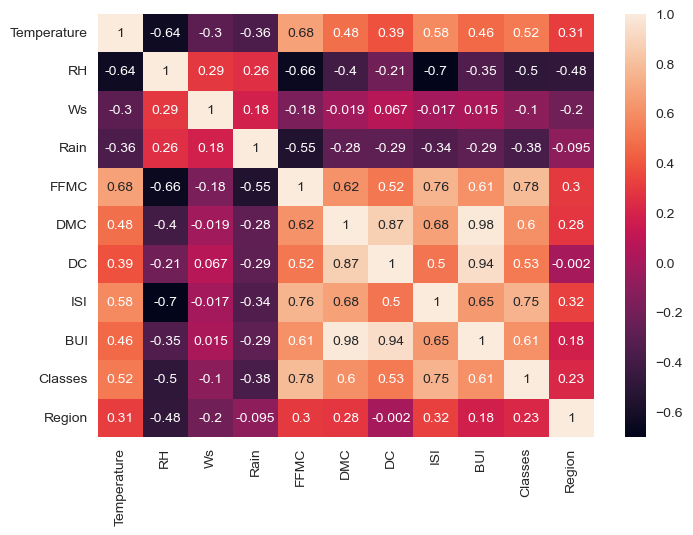

In [204]:
## Check for multicollinearity

sns.heatmap(X_train.corr(),annot=True)

In [206]:
## Function to find co-related features

def correlation(df,threshold):
    col_corr = set()
    corr_matrix = df.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range (i):
            if abs(corr_matrix.iloc[i,j])>threshold:
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr
    

In [208]:
corr_features = correlation(X_train,0.85)
corr_features

{'BUI', 'DC'}

In [210]:
X_test.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
Temperature,1.000000,-0.674318,-0.265020,-0.212267,0.679556,0.485622,0.339874,0.659640,0.440644,0.498402,0.161007
RH,-0.674318,1.000000,0.078386,0.097349,-0.590793,-0.412876,-0.284134,-0.632908,-0.370428,-0.229687,-0.182674
Ws,-0.265020,0.078386,1.000000,0.122829,-0.142625,0.057572,0.119497,0.093914,0.081079,0.033067,-0.089988
Rain,-0.212267,0.097349,0.122829,1.000000,-0.525753,-0.331526,-0.339757,-0.362996,-0.336489,-0.389919,0.152715
FFMC,0.679556,-0.590793,-0.142625,-0.525753,1.000000,0.559160,0.474917,0.685886,0.536529,0.728396,0.001502
DMC,0.485622,-0.412876,0.057572,-0.331526,0.559160,1.000000,0.902291,0.681873,0.986000,0.533412,-0.086978
DC,0.339874,-0.284134,0.119497,-0.339757,0.474917,0.902291,1.000000,0.525904,0.960533,0.468958,-0.294590
ISI,0.659640,-0.632908,0.093914,-0.362996,0.685886,0.681873,0.525904,1.000000,0.632740,0.682223,0.097534
BUI,0.440644,-0.370428,0.081079,-0.336489,0.536529,0.986000,0.960533,0.632740,1.000000,0.517195,-0.171275
Classes,0.498402,-0.229687,0.033067,-0.389919,0.728396,0.533412,0.468958,0.682223,0.517195,1.000000,-0.020518


In [212]:
X_test = X_test.drop(corr_features,axis =1)
X_train = X_train.drop(corr_features,axis =1)
X_train.shape,X_test.shape

((182, 9), (61, 9))

## Feature scaling or standardization

In [214]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [216]:
X_train_scaled

array([[ 1.0220699 , -0.42693989,  0.82514401, ...,  1.22090706,
         0.8660254 , -0.97825827],
       [-0.07699493,  0.10756095, -0.53391671, ...,  0.17939642,
         0.8660254 , -0.97825827],
       [-1.45082596, -0.15968947,  0.82514401, ..., -0.59568128,
        -1.15470054,  1.02222494],
       ...,
       [ 0.47253749, -0.15968947,  0.14561365, ...,  0.61537762,
         0.8660254 ,  1.02222494],
       [ 1.57160231, -1.76319198, -0.19415153, ...,  2.62573538,
         0.8660254 ,  1.02222494],
       [ 0.19777128, -1.02825333, -0.53391671, ..., -0.71678716,
        -1.15470054,  1.02222494]])

## Box plot to understand effect of Standard scaler

C:\Users\shivam\AppData\Local\Temp\ipykernel_19020\3361496575.py:2: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1,2,1)


TypeError: boxplot() missing 1 required positional argument: 'x'

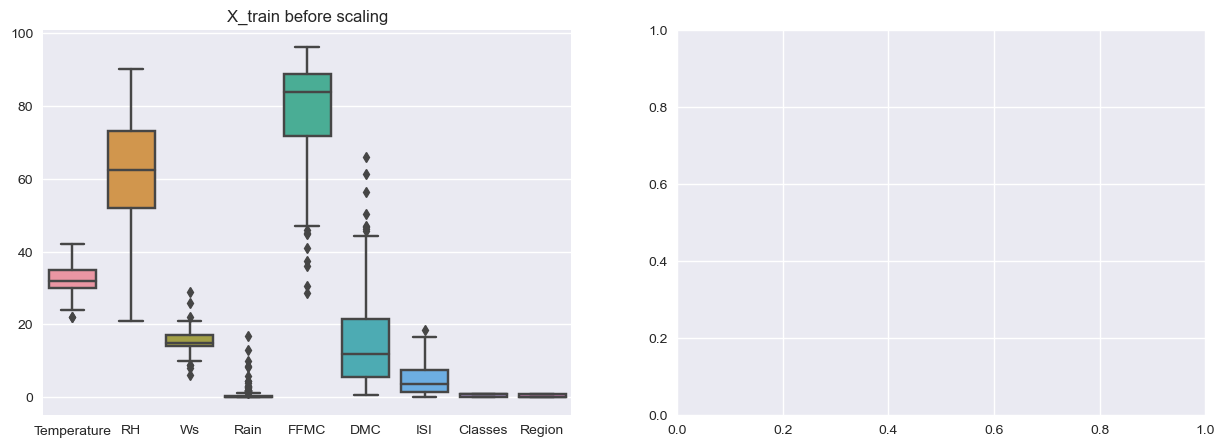

In [218]:
plt.subplots(figsize = (15,5))
plt.subplot(1,2,1)
sns.boxplot(data = X_train)
plt.title('X_train before scaling')
plt.subplot(1,2,2)
plt.boxplot(data = X_train_scaled)
plt.title('X')

## Linear Regression

Mean absolute error: 0.9055650801336728
 Mean squared error: 4.800581975914326
 r2_score: 0.9053862337452505


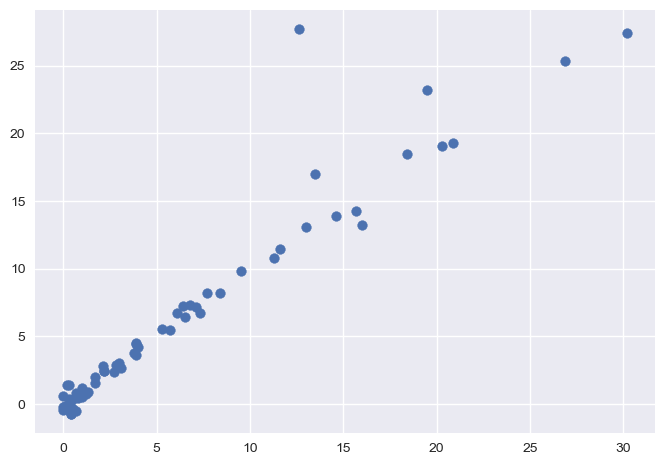

In [228]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

linreg = LinearRegression()
linreg.fit(X_train_scaled,y_train)
y_pred=linreg.predict(X_test_scaled)
mae = mean_absolute_error(y_test,y_pred)
mse = mean_squared_error(y_test,y_pred)
score = r2_score(y_test,y_pred)

print(f"Mean absolute error: {mae}\n Mean squared error: {mse}\n r2_score: {score}")
plt.scatter(y_test,y_pred)

## Lasso Regression

Mean absolute error: 1.4758044023699333
 Mean squared error: 5.2113021194218545
 r2_score: 0.8972914277719524


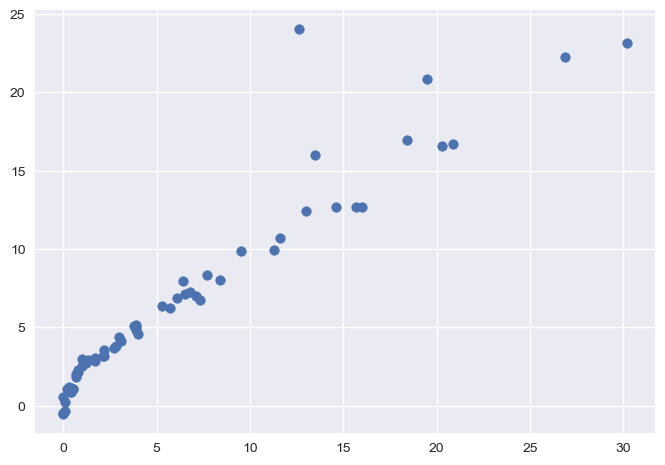

In [230]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

lassoreg = Lasso()
lassoreg.fit(X_train_scaled,y_train)
y_pred=lassoreg.predict(X_test_scaled)
mae = mean_absolute_error(y_test,y_pred)
mse = mean_squared_error(y_test,y_pred)
score = r2_score(y_test,y_pred)

print(f"Mean absolute error: {mae}\n Mean squared error: {mse}\n r2_score: {score}")
plt.scatter(y_test,y_pred)

## Lasso Cross Validation

In [243]:
from sklearn.linear_model import LassoCV
lassocv = LassoCV(cv = 5)
lassocv.fit(X_train_scaled,y_train)


LassoCV(cv=5)

Mean absolute error: 0.8988572503828615
 Mean squared error: 4.726299547495128
 r2_score: 0.9068502521402182


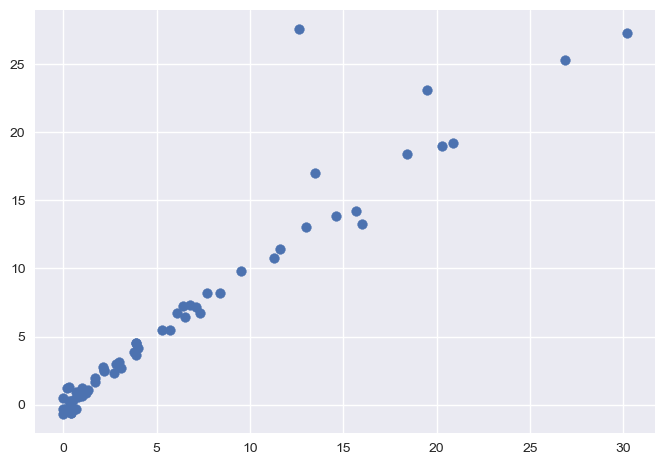

In [251]:
y_pred = lassocv.predict(X_test_scaled)
mae = mean_absolute_error(y_test,y_pred)
mse = mean_squared_error(y_test,y_pred)
score = r2_score(y_test,y_pred)

print(f"Mean absolute error: {mae}\n Mean squared error: {mse}\n r2_score: {score}")
plt.scatter(y_test,y_pred)

## Ridge regression

Mean absolute error: 0.9037853528479405
 Mean squared error: 4.6456990381732215
 r2_score: 0.9084387924020568


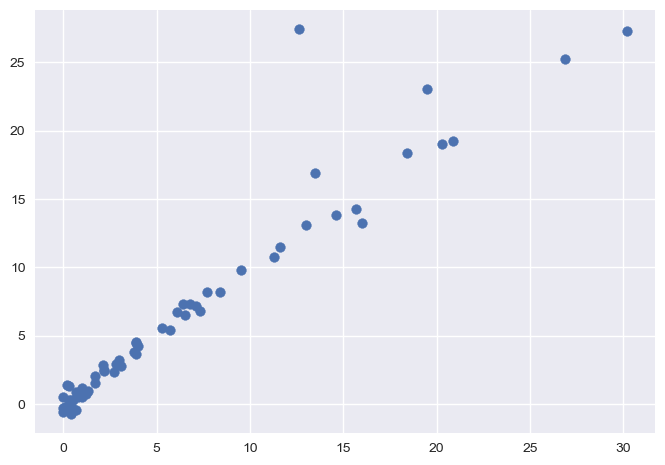

In [254]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

ridge = Ridge()
ridge.fit(X_train_scaled,y_train)
y_pred=ridge.predict(X_test_scaled)
mae = mean_absolute_error(y_test,y_pred)
mse = mean_squared_error(y_test,y_pred)
score = r2_score(y_test,y_pred)

print(f"Mean absolute error: {mae}\n Mean squared error: {mse}\n r2_score: {score}")
plt.scatter(y_test,y_pred)

Mean absolute error: 0.9051988823937244
 Mean squared error: 4.784147089089262
 r2_score: 0.905710145835137


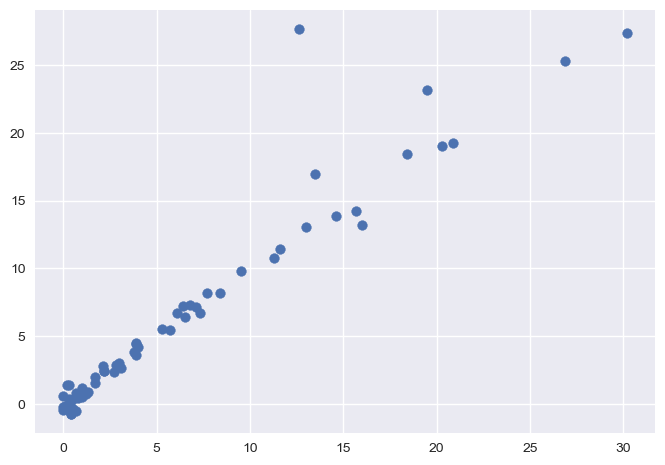

In [256]:
## Ridge CV
from sklearn.linear_model import RidgeCV
ridgecv = RidgeCV(cv = 5)
ridgecv.fit(X_train_scaled,y_train)
y_pred = ridgecv.predict(X_test_scaled)
mae = mean_absolute_error(y_test,y_pred)
mse = mean_squared_error(y_test,y_pred)
score = r2_score(y_test,y_pred)
print(f"Mean absolute error: {mae}\n Mean squared error: {mse}\n r2_score: {score}")
plt.scatter(y_test,y_pred)

## Elastic net

Mean absolute error: 1.9601776492343825
 Mean squared error: 6.910985055125415
 r2_score: 0.8637926968279371


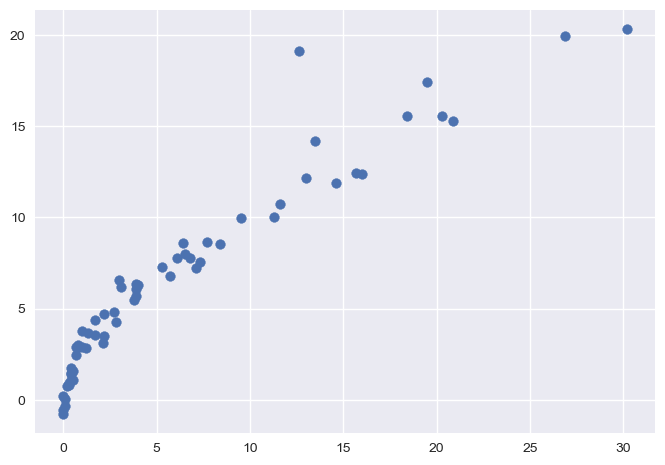

In [260]:
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

en = ElasticNet()
en.fit(X_train_scaled,y_train)
y_pred=en.predict(X_test_scaled)
mae = mean_absolute_error(y_test,y_pred)
mse = mean_squared_error(y_test,y_pred)
score = r2_score(y_test,y_pred)

print(f"Mean absolute error: {mae}\n Mean squared error: {mse}\n r2_score: {score}")
plt.scatter(y_test,y_pred)

Mean absolute error: 0.9051988823937244
 Mean squared error: 4.784147089089262
 r2_score: 0.905710145835137


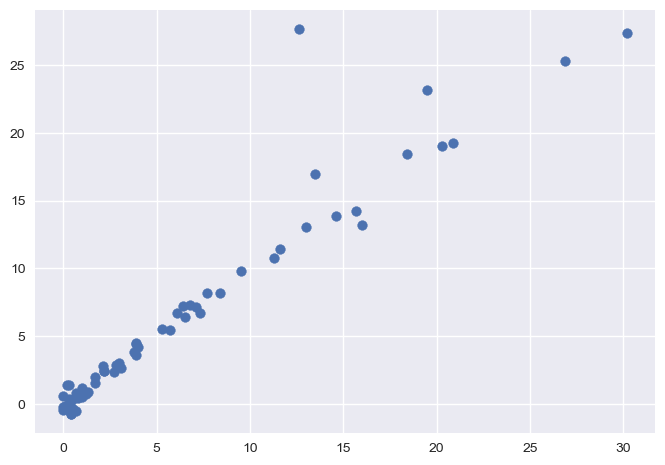

In [262]:
## Elasticnet CV
from sklearn.linear_model import ElasticNetCV
ENcv = RidgeCV(cv = 5)
ENcv.fit(X_train_scaled,y_train)
y_pred = ENcv.predict(X_test_scaled)
mae = mean_absolute_error(y_test,y_pred)
mse = mean_squared_error(y_test,y_pred)
score = r2_score(y_test,y_pred)
print(f"Mean absolute error: {mae}\n Mean squared error: {mse}\n r2_score: {score}")
plt.scatter(y_test,y_pred)

In [266]:
## Pickling the model and scaler

import pickle

pickle.dump(scaler,open('scaler.pkl','wb'))
pickle.dump(ridge,open('ridge.pkl','wb'))